In [2]:
from datascience import *
import numpy as np
import datetime
import time
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
heart = Table().read_table('heart_rate.csv')

In [4]:
heart.show(5)

time,hr
1514061195,93
1514183465,87
1514277516,98
1514374448,108
1514378956,69


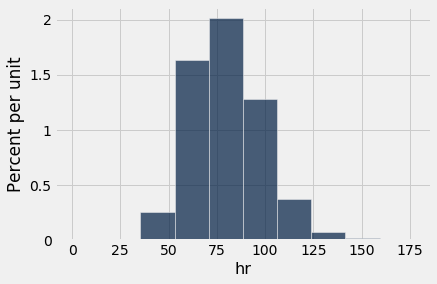

In [5]:
heart.hist('hr')

In [6]:
sleep = Table().read_table('sleep.csv')

In [7]:
sleep.show(5)

id,start_time,end_time,awake,deep,light,stages,deleted,manually
1,1514238900,1514268360,1,236,254,35L10D12L16D23L1A7L15D4L25D2L57D15L10D31L31D23L37D28L13D ...,0,0
2,1514315040,1514317560,0,32,10,10L32D,0,0
3,1514326380,1514356200,0,224,273,10L36D6L22D12L45D15L21D77L11D7L34D63L18D56L11D14L13D2L13D11L,0,0
4,1514414880,1514443020,1,176,292,27L41D19L50D59L1A7L22D22L10D32L11D45L21D9L11D60L10D12L,0,0
5,1514500200,1514529480,0,233,255,10L20D2L23D2L48D11L29D2L37D44L31D19L11D12L11D21L12D14L11 ...,0,0


In [8]:
to_drop='stages'
sleep_without_stages = sleep.drop(to_drop)

In [9]:
sleep_without_stages.show(5)

id,start_time,end_time,awake,deep,light,deleted,manually
1,1514238900,1514268360,1,236,254,0,0
2,1514315040,1514317560,0,32,10,0,0
3,1514326380,1514356200,0,224,273,0,0
4,1514414880,1514443020,1,176,292,0,0
5,1514500200,1514529480,0,233,255,0,0


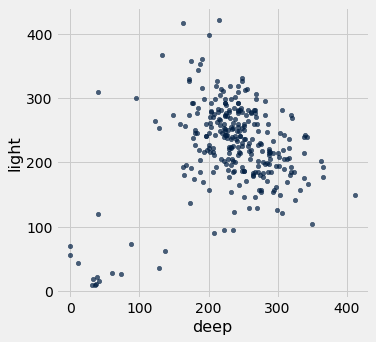

In [10]:
sleep_without_stages.scatter('deep', 'light')

In [11]:
steps = Table().read_table('steps.csv')

In [12]:
steps.show(5)

time,intensity,steps,category
1514193360,28,0,96
1514193420,20,0,80
1514193480,7,0,80
1514193540,15,0,80
1514193600,20,0,90


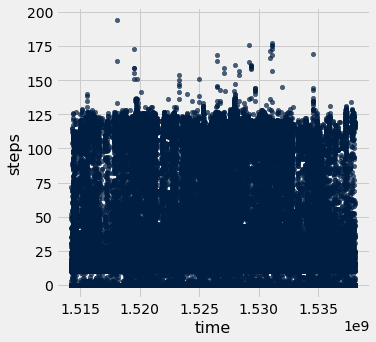

In [13]:
steps.scatter('time', 'steps')

In [32]:
def change_time(epoch_time):
    '''transforms epoch_time from the original db to human readable time'''
    human_time = time.strftime("%a %d-%m-%Y %H:%M:%S", time.gmtime(epoch_time)) #UTC time
    #'Mon 25-12-2017 21:55:00'
    return human_time
#change_time(1514238900)

def say_weekday(epoch_time):
    '''transforms epoch_time from the original db to human readable day of the week'''
    human_day = time.strftime("%a", time.gmtime(epoch_time))
    #'Mon'
    return human_day
#say_day(1514238900)

def say_hour(epoch_time):
    '''transforms epoch_time from the original db to human readable hour - UTC'''
    human_hour = time.strftime("%H:%M:%S", time.gmtime(epoch_time))
    #'21:55:00'
    return human_hour
#say_hour(1514238900)

def say_year(epoch_time):
    '''transforms epoch_time from the original db to human readable year'''
    human_year = time.strftime("%Y", time.gmtime(epoch_time))
    #'2017'
    return int(human_year)
#say_year(1514238900)

def say_month(epoch_time):
    '''transforms epoch_time from the original db to human readable number of the month'''
    human_month = time.strftime("%m", time.gmtime(epoch_time))
    #'2017'
    return int(human_month)
#say_month(1514238900)

def say_day_month(epoch_time):
    '''transforms epoch_time from the original db to human readable day of the month'''
    human_month = time.strftime("%d", time.gmtime(epoch_time))
    #'25'
    return int(human_month)
#say_day_month(1514238900)
    
    

In [33]:
def say_weekday_table(table, label_time_col):
    '''says the day from an epoch time for a specific column label in a table'''
    temp_time_array = table.column(label_time_col)
    days = []
    for i in range(len(temp_time_array)):
        d = say_weekday(int(temp_time_array[i]))
        days.append(d)
    return days

def say_time_table(table, label_time_col):
    '''says the time from an epoch time for a specific column label in a table'''
    temp_time_array = table.column(label_time_col)
    times = []
    for i in range(len(temp_time_array)):
        t = say_hour(int(temp_time_array[i]))
        times.append(t)
    return times

def say_year_table(table, label_time_col):
    '''says the year from an epoch time for a specific column label in a table'''
    temp_time_array = table.column(label_time_col)
    years = []
    for i in range(len(temp_time_array)):
        y = say_year(int(temp_time_array[i]))
        years.append(y)
    return years

def say_month_table(table, label_time_col):
    '''says the number of the month from an epoch time for a specific column label in a table'''
    temp_time_array = table.column(label_time_col)
    months = []
    for i in range(len(temp_time_array)):
        m = say_month(int(temp_time_array[i]))
        if int(m)/10 < 1:
            m = int(m) % 10
        months.append(m)
    return months

def say_day_month_table(table, label_time_col):
    '''says the day of the month from an epoch time for a specific column label in a table'''
    temp_time_array = table.column(label_time_col)
    d_ms = []
    for i in range(len(temp_time_array)):
        d_m = say_day_month(int(temp_time_array[i]))
        if int(d_m)/10 < 1:
            d_m = int(d_m) % 10
        d_ms.append(d_m)
    return d_ms


In [34]:
#appends the original table with day, time and year in human time
heart = heart.with_columns(
    'time (UTC)', say_time_table(heart, 'time'),
    'day', say_weekday_table(heart, 'time'),
    'day of the month', say_day_month_table(heart, 'time'),
    'month', say_month_table(heart, 'time'),
    'year', say_year_table(heart, 'time')
)
#heart.show(5)
#heart.rows[157087]

steps = steps.with_columns(
    'time (UTC)', say_time_table(steps, 'time'),
    'day', say_weekday_table(steps, 'time'),
    'day of the month', say_day_month_table(steps, 'time'),
    'month', say_month_table(steps, 'time'),
    'year', say_year_table(steps, 'time')
)

#steps.show(5)
#steps.rows[398697]

sleep = sleep.with_columns(
    'start_time (UTC)', say_time_table(sleep, 'start_time'),
    'end_time (UTC)', say_time_table(sleep, 'end_time'),
    'total hours of sleep', (sleep.column('deep') + sleep.column('light'))/60,
    'start_day', say_weekday_table(sleep, 'start_time'),
    'end_day', say_weekday_table(sleep, 'end_time'),
    'start day of the month', say_day_month_table(sleep, 'start_time'),
    'end day of the month', say_day_month_table(sleep, 'end_time'),
    'month', say_month_table(sleep, 'start_time'),
    'year', say_year_table(sleep, 'start_time')
)

#sleep.show(5)
#sleep.rows[289]
     

id,start_time,end_time,awake,deep,light,stages,deleted,manually,start_time (UTC),end_time (UTC),total hours of sleep,start_day,end_day,start day of the month,end day of the month,month,year
1,1514238900,1514268360,1,236,254,35L10D12L16D23L1A7L15D4L25D2L57D15L10D31L31D23L37D28L13D ...,0,0,21:55:00,06:06:00,8.16667,Mon,Tue,25,26,12,2017
2,1514315040,1514317560,0,32,10,10L32D,0,0,19:04:00,19:46:00,0.7,Tue,Tue,26,26,12,2017
3,1514326380,1514356200,0,224,273,10L36D6L22D12L45D15L21D77L11D7L34D63L18D56L11D14L13D2L13D11L,0,0,22:13:00,06:30:00,8.28333,Tue,Wed,26,27,12,2017
4,1514414880,1514443020,1,176,292,27L41D19L50D59L1A7L22D22L10D32L11D45L21D9L11D60L10D12L,0,0,22:48:00,06:37:00,7.8,Wed,Thu,27,28,12,2017
5,1514500200,1514529480,0,233,255,10L20D2L23D2L48D11L29D2L37D44L31D19L11D12L11D21L12D14L11 ...,0,0,22:30:00,06:38:00,8.13333,Thu,Fri,28,29,12,2017


Row(id=290, start_time=1538086320, end_time=1538114280, awake=0, deep=224, light=242, stages='23L38D7L20D11L20D4L17D14L47D7L27D24L11D10L18D9L14D59L12D74L', deleted=0, manually=0, start_time (UTC)='22:12:00', end_time (UTC)='05:58:00', total hours of sleep=7.766666666666667, start_day='Thu', end_day='Fri', start day of the month=27, end day of the month=28, month=9, year=2018)

In [ ]:
heart_day = Table().with_columns("hr", heart.column('hr'), "day", heart.column("day"))
heart_day.show(5)
heart_day.scatter('day')

heart_time = Table().with_columns("hr", heart.column('hr'), "time", heart.column("time (UTC)"))
heart_time.show(5)
heart_time.scatter('time')

hr,day
93,Sat
87,Mon
98,Tue
108,Wed
69,Wed


hr,time
93,20:33:15
87,06:31:05
98,08:38:36
108,11:34:08
69,12:49:16


In [ ]:
heart_time.scatter()